In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import re
import string
import urllib
import gzip
import time
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from collections import Counter

from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 

from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, Flatten, MaxPool1D, MaxPooling1D, GlobalMaxPooling1D

from keras.layers.merge import concatenate
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding

import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.models import Sequential


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Data Gathering

In [3]:
real_news = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Getting Real about Fake News_Kaggle/real.csv")
real_news.head()

,Unnamed: 0,Unnamed: 0.1,id,title,publication,author,date,year,month,url,content
0,0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,8,8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ..."
2,9,9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...
3,2547,2547,20127,U.S. Plans to Step Up Military Campaign Agains...,New York Times,Michael S. Schmidt and Eric Schmitt,2016-12-21,2016.0,12.0,NaN,"ABU DHABI, United Arab Emirates — The Obama..."
4,2551,2551,20131,272 Slaves Were Sold to Save Georgetown. What ...,New York Times,Rachel L. Swarns,2016-12-15,2016.0,12.0,NaN,WASHINGTON — The human cargo was loaded on ...


In [4]:
fake_news = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Getting Real about Fake News_Kaggle/fake.csv")
fake_news.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [5]:
# essential columns
fake_news1 = fake_news[['title', 'text','language','site_url']]
fake_news1 = fake_news1[fake_news1.language == 'english']
fake_news1['title'].fillna(value="", inplace=True)

# drop null 'text' rows as there is no context of the article
fake_news1.dropna(axis=0, inplace=True, subset=['text'])

# data shuffling and resetting index to avoid bias
fake_news1 = fake_news1.sample(frac=1.0) 
fake_news1.reset_index(drop=True,inplace=True)
fake_news1.head()

,title,text,language,site_url
0,,So he didn't question where he was sending ema...,english,westernjournalism.com
1,If Hillary Clinton Is Charged With Obstruction...,Posted by Michael Snyder \nIn the world of pol...,english,dcclothesline.com
2,Is A Birthday Surprise Coming For Hillary Crim...,We Are Change \nWikileaks helped celebrate Hil...,english,wearechange.org
3,"Forget judges, Twitter has been suggesting som...","Next Prev Swipe left/right Forget judges, Twit...",english,thepoke.co.uk
4,"Chicago, Nearly a War Zone",Email \nThe year 2016 is set to become one of ...,english,thenewamerican.com


In [6]:
#feature extraction
fake_news2 = fake_news1[['title', 'text','site_url']]

#data labelling
fake_news2['label'] = 'fake'
fake_news2.head()

,title,text,site_url,label
0,,So he didn't question where he was sending ema...,westernjournalism.com,fake
1,If Hillary Clinton Is Charged With Obstruction...,Posted by Michael Snyder \nIn the world of pol...,dcclothesline.com,fake
2,Is A Birthday Surprise Coming For Hillary Crim...,We Are Change \nWikileaks helped celebrate Hil...,wearechange.org,fake
3,"Forget judges, Twitter has been suggesting som...","Next Prev Swipe left/right Forget judges, Twit...",thepoke.co.uk,fake
4,"Chicago, Nearly a War Zone",Email \nThe year 2016 is set to become one of ...,thenewamerican.com,fake


In [7]:
#all site_urls
site_urls = fake_news2['site_url']

#removing domain extensions
site_urls2 = [x.split('.',1)[0] for x in site_urls]

#replacing the old site_url column with these values
fake_news2['site_url'] = site_urls2
fake_news2.head()

,title,text,site_url,label
0,,So he didn't question where he was sending ema...,westernjournalism,fake
1,If Hillary Clinton Is Charged With Obstruction...,Posted by Michael Snyder \nIn the world of pol...,dcclothesline,fake
2,Is A Birthday Surprise Coming For Hillary Crim...,We Are Change \nWikileaks helped celebrate Hil...,wearechange,fake
3,"Forget judges, Twitter has been suggesting som...","Next Prev Swipe left/right Forget judges, Twit...",thepoke,fake
4,"Chicago, Nearly a War Zone",Email \nThe year 2016 is set to become one of ...,thenewamerican,fake


In [8]:
#feature extraction
real_news2 = real_news[['title', 'content', 'publication']]

#data labelling
real_news2['label'] = 'real'
real_news2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,title,content,publication,label
0,House Republicans Fret About Winning Their Hea...,WASHINGTON — Congressional Republicans have...,New York Times,real
1,"First, a Mixtape. Then a Romance. - The New Yo...","Just how is Hillary Kerr, the founder of ...",New York Times,real
2,Calling on Angels While Enduring the Trials of...,Angels are everywhere in the Muñiz family’s ap...,New York Times,real
3,U.S. Plans to Step Up Military Campaign Agains...,"ABU DHABI, United Arab Emirates — The Obama...",New York Times,real
4,272 Slaves Were Sold to Save Georgetown. What ...,WASHINGTON — The human cargo was loaded on ...,New York Times,real


In [9]:
#rename features in our final datasets
newlabels = ['title', 'content', 'publication', 'label']
real_news2.columns = newlabels
fake_news2.columns = newlabels

In [10]:
fake_news2.head()

,title,content,publication,label
0,,So he didn't question where he was sending ema...,westernjournalism,fake
1,If Hillary Clinton Is Charged With Obstruction...,Posted by Michael Snyder \nIn the world of pol...,dcclothesline,fake
2,Is A Birthday Surprise Coming For Hillary Crim...,We Are Change \nWikileaks helped celebrate Hil...,wearechange,fake
3,"Forget judges, Twitter has been suggesting som...","Next Prev Swipe left/right Forget judges, Twit...",thepoke,fake
4,"Chicago, Nearly a War Zone",Email \nThe year 2016 is set to become one of ...,thenewamerican,fake


In [11]:
real_news2.head()

,title,content,publication,label
0,House Republicans Fret About Winning Their Hea...,WASHINGTON — Congressional Republicans have...,New York Times,real
1,"First, a Mixtape. Then a Romance. - The New Yo...","Just how is Hillary Kerr, the founder of ...",New York Times,real
2,Calling on Angels While Enduring the Trials of...,Angels are everywhere in the Muñiz family’s ap...,New York Times,real
3,U.S. Plans to Step Up Military Campaign Agains...,"ABU DHABI, United Arab Emirates — The Obama...",New York Times,real
4,272 Slaves Were Sold to Save Georgetown. What ...,WASHINGTON — The human cargo was loaded on ...,New York Times,real


#Data Concatenation

In [12]:
#dataframe combined to form a new final Fake News Detection dataset
dataframes = [fake_news2, real_news2]
final_dataset = pd.concat(dataframes)
final_dataset

,title,content,publication,label
0,,So he didn't question where he was sending ema...,westernjournalism,fake
1,If Hillary Clinton Is Charged With Obstruction...,Posted by Michael Snyder \nIn the world of pol...,dcclothesline,fake
2,Is A Birthday Surprise Coming For Hillary Crim...,We Are Change \nWikileaks helped celebrate Hil...,wearechange,fake
3,"Forget judges, Twitter has been suggesting som...","Next Prev Swipe left/right Forget judges, Twit...",thepoke,fake
4,"Chicago, Nearly a War Zone",Email \nThe year 2016 is set to become one of ...,thenewamerican,fake
...,...,...,...,...
15707,An eavesdropping Uber driver saved his 16-year...,Uber driver Keith Avila picked up a p...,Washington Post,real
15708,Plane carrying six people returning from a Cav...,Crews on Friday continued to search L...,Washington Post,real
15709,After helping a fraction of homeowners expecte...,When the Obama administration announced a...,Washington Post,real
15710,"Yes, this is real: Michigan just banned bannin...",This story has been updated. A new law in...,Washington Post,real


In [13]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28069 entries, 0 to 15711
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        28069 non-null  object
 1   content      28069 non-null  object
 2   publication  28069 non-null  object
 3   label        28069 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [14]:
final_dataset['label'] = final_dataset['label'].map({'real': 1, 'fake': 0})
final_dataset

,title,content,publication,label
0,,So he didn't question where he was sending ema...,westernjournalism,0
1,If Hillary Clinton Is Charged With Obstruction...,Posted by Michael Snyder \nIn the world of pol...,dcclothesline,0
2,Is A Birthday Surprise Coming For Hillary Crim...,We Are Change \nWikileaks helped celebrate Hil...,wearechange,0
3,"Forget judges, Twitter has been suggesting som...","Next Prev Swipe left/right Forget judges, Twit...",thepoke,0
4,"Chicago, Nearly a War Zone",Email \nThe year 2016 is set to become one of ...,thenewamerican,0
...,...,...,...,...
15707,An eavesdropping Uber driver saved his 16-year...,Uber driver Keith Avila picked up a p...,Washington Post,1
15708,Plane carrying six people returning from a Cav...,Crews on Friday continued to search L...,Washington Post,1
15709,After helping a fraction of homeowners expecte...,When the Obama administration announced a...,Washington Post,1
15710,"Yes, this is real: Michigan just banned bannin...",This story has been updated. A new law in...,Washington Post,1


#Data Pre-Processing

In [15]:
final_dataset['content'] = final_dataset['title'] + " " + final_dataset['content']

In [16]:
def preprocess_text(df, remove_special=True):
    texts = df['content'].copy()
    labels = df['label'].copy()

    #Remove links 
    df["content"] = df["content"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
    
    #Keep the End Of Sentence characters
    df["content"] = df["content"].apply(lambda x: re.sub(r'\.', ' EOSTokenDot ', x + " "))
    df["content"] = df["content"].apply(lambda x: re.sub(r'\?', ' EOSTokenQuest ', x + " "))
    df["content"] = df["content"].apply(lambda x: re.sub(r'!', ' EOSTokenExs ', x + " "))
        
    #Strip Punctation
    df["content"] = df["content"].apply(lambda x: re.sub(r'[\.+]', ".",x))

    #Remove multiple fullstops
    df["content"] = df["content"].apply(lambda x: re.sub(r'[^\w\s]','',x))

    #Remove Non-words
    df["content"] = df["content"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

    #Convert content to lowercase
    df["content"] = df["content"].apply(lambda x: x.lower())
        
    #Remove multiple letter repeating words
    df["content"] = df["content"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 

    #Remove very short or long words
    df["content"] = df["content"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
    df["content"] = df["content"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))
    
    return df

#Preprocessing of entered Text
final_dataset = preprocess_text(final_dataset)

In [17]:
#Remove posts with less than X words
min_words = 15
print("Before : Number of posts", len(final_dataset)) 
final_dataset["no. of. words"] = final_dataset["content"].apply(lambda x: len(re.findall(r'\w+', x)))
final_dataset = final_dataset[final_dataset["no. of. words"] >= min_words]
print("After : Number of posts", len(final_dataset))
final_dataset

Before : Number of posts 28069
After : Number of posts 27472


,title,content,publication,label,no. of. words
0,,didnt question where sending emails eosto...,westernjournalism,0,29
1,If Hillary Clinton Is Charged With Obstruction...,hillary clinton charged with obstruction ju...,dcclothesline,0,837
2,Is A Birthday Surprise Coming For Hillary Crim...,birthday surprise coming hillary criminalto...,wearechange,0,356
3,"Forget judges, Twitter has been suggesting som...",forget judges twitter been suggesting some tr...,thepoke,0,89
4,"Chicago, Nearly a War Zone",chicago nearly zone email \n year become...,thenewamerican,0,530
...,...,...,...,...,...
15707,An eavesdropping Uber driver saved his 16-year...,eavesdropping uber driver saved yearold pass...,Washington Post,1,523
15708,Plane carrying six people returning from a Cav...,plane carrying people returning from cavalie...,Washington Post,1,419
15709,After helping a fraction of homeowners expecte...,after helping fraction homeowners expected o...,Washington Post,1,782
15710,"Yes, this is real: Michigan just banned bannin...",this real michigan just banned banning plast...,Washington Post,1,458


Feature Splitting

In [18]:
## Get the Independent Features
X=final_dataset.drop('label',axis=1)

In [19]:
## Get the Dependent features
y=final_dataset['label']

In [20]:
print(X.shape)
print(y.shape)

(27472, 4)
(27472,)


In [21]:
messages=X.copy()

In [22]:
messages['title'][1]

1    If Hillary Clinton Is Charged With Obstruction...
1    First, a Mixtape. Then a Romance. - The New Yo...
Name: title, dtype: object

As we dropped nan values, we see because of concatenation, 1 rows have same indices. So we reset index

In [23]:
messages.reset_index(inplace=True)

In [24]:
#Stemming & STop words removal
ps = PorterStemmer()
corpus = []
#for loop runs through all the posts 1 at a time, review has list of words in each sentence
for i in range(0, len(messages)):
    #print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['content'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [25]:
corpus[:2]

['didnt question send email eostokendot eostokendot eostokendot name adress eostokendot eostokendot presid knowledg state action eostokendot eostokendot eostokendot find difficult believ insult eostokendot eostokendot eostokendot',
 'hillari clinton charg obstruct justic could prison year post michael snyder world polit coverup often wors origin crime eostokendot role waterg coverup took richard nixon hillari clinton coverup email scandal could send prison long time eostokendot news broke renew investig hillari clinton email sent shockwav throughout polit world eostokendot time around arent talk investig mishandl classifi document eostokendot havent heard anyon talk discov hillari clinton alter destroy conceal email turn origin investig could charg obstruct justic eostokendot would immedi polit career found guilti could send prison rest life eostokendot seen singl news report mention phrase obstruct justic convinc good chanc scandal head eostokendot follow relev part feder statut deal 

#One Hot Representation

In [26]:
### Vocabulary size 
voc_size=10000

Convert SENTENCES into One-Hot code, given - a vocabulary size

In [27]:
onehot_rep=[one_hot(words,voc_size)for words in corpus] 
onehot_rep[:2]

[[5761,
  7629,
  482,
  1934,
  9059,
  9059,
  9059,
  9162,
  868,
  9059,
  9059,
  5634,
  3192,
  2262,
  7125,
  9059,
  9059,
  9059,
  8462,
  6250,
  3390,
  416,
  9059,
  9059,
  9059],
 [2021,
  188,
  4841,
  6654,
  1855,
  4668,
  2859,
  8331,
  1124,
  4347,
  2460,
  8648,
  707,
  6074,
  5769,
  8218,
  5421,
  1374,
  9059,
  907,
  4674,
  6074,
  538,
  2284,
  9808,
  2021,
  188,
  6074,
  1934,
  3022,
  4668,
  482,
  2859,
  5363,
  5380,
  9059,
  5878,
  9625,
  778,
  4720,
  2021,
  188,
  1934,
  2354,
  2171,
  7313,
  707,
  8648,
  9059,
  5380,
  8088,
  7583,
  5488,
  4720,
  8088,
  4995,
  1479,
  9059,
  6247,
  6056,
  6808,
  5488,
  1159,
  2021,
  188,
  1411,
  9059,
  5107,
  1934,
  397,
  5421,
  4720,
  4668,
  4841,
  6654,
  1855,
  9059,
  3989,
  9575,
  707,
  1676,
  8346,
  4625,
  4668,
  482,
  2859,
  5887,
  5321,
  9059,
  8574,
  1466,
  5878,
  1056,
  1090,
  3752,
  6654,
  1855,
  71,
  6293,
  9085,
  3022,
  4223,
 

#DL Model: CNN + 1Hot

Pad Sequencing makes all sentences of equal length of the  1 hot representation

In [28]:
### Vocabulary size 
voc_size=10000
onehot_rep=[one_hot(words,voc_size)for words in corpus] 

sent_length=1500
#pre adds 0 before those sentences that are < 1500 words
embedded_docs=pad_sequences(onehot_rep,padding='pre',maxlen=sent_length)
print(embedded_docs[:2])

[[   0    0    0 ... 9059 9059 9059]
 [   0    0    0 ... 5546 9059 6799]]


In [29]:
embedded_docs[0]

array([   0,    0,    0, ..., 9059, 9059, 9059], dtype=int32)

In [30]:
len(embedded_docs),y.shape

(27472, (27472,))

In [31]:
#Creating the Model
#embedding - takes input & converts them into certain no. of features - based on this no. that it gives output

#Creating the Simple CNN model
sequence_input = Input(shape=(sent_length,), dtype='int32')

embedding_layer = Embedding(len(embedded_docs), output_dim=1500, weights=[embedded_docs], input_length=sent_length, trainable=False)(sequence_input)

#embedded_sequences = embedding_layer(sequence_input)

l_cov1= Conv1D(128, 5, activation='relu')(embedding_layer)
l_pool1 = MaxPooling1D(5)(l_cov1)

l_cov2 = Conv1D(128, 5, activation='relu')(l_pool1)
l_pool2 = MaxPooling1D(5)(l_cov2)

l_cov3 = Conv1D(128, 5, activation='relu')(l_pool2)
# global max pooling
l_pool3 = MaxPooling1D(35)(l_cov3) 

l_flat = Flatten()(l_pool3)
l_dense = Dense(128, activation='relu')(l_flat)
preds = Dense(2, activation='sigmoid')(l_dense)

model = Model(sequence_input, preds)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

#print("Fitting the simple convolutional neural network model")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1500)]            0         
                                                                 
 embedding (Embedding)       (None, 1500, 1500)        41208000  
                                                                 
 conv1d (Conv1D)             (None, 1496, 128)         960128    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 299, 128)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 295, 128)          82048     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 59, 128)          0         
 1D)                                                         

In [32]:
#embedded_docs has all the Independent features - convert it back to an array : 
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [33]:
X_final.shape,y_final.shape

((27472, 1500), (27472,))

#67-33 Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [35]:
# print(X_train1.shape)
# print(X_test1.shape)
# print(y_train1.shape)
# print(y_test1.shape)

In [36]:
tf.config.run_functions_eagerly(True)

In [37]:
history1 = model.fit(X_train1,y_train1,validation_data=(X_test1,y_test1),epochs=5,batch_size=64)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


288/288 [==============================] - 105s 331ms/step - loss: 91.0581 - accuracy: 0.4296 - val_loss: 80.6838 - val_accuracy: 0.4337
Epoch 2/5
288/288 [==============================] - 96s 333ms/step - loss: 70.8085 - accuracy: 0.4298 - val_loss: 76.6849 - val_accuracy: 0.4336
Epoch 3/5
288/288 [==============================] - 105s 366ms/step - loss: 62.7407 - accuracy: 0.4296 - val_loss: 70.2141 - val_accuracy: 0.4337
Epoch 4/5
288/288 [==============================] - 105s 366ms/step - loss: 56.2024 - accuracy: 0.4295 - val_loss: 72.8356 - val_accuracy: 0.4334
Epoch 5/5
288/288 [==============================] - 106s 366ms/step - loss: 51.5361 - accuracy: 0.4294 - val_loss: 67.7009 - val_accuracy: 0.4335


In [38]:
y_pred1 = (model.predict(X_test1) >= 0.5).astype("int32")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Based on https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html 

1-dimensional tensors are required by this method.
If your target is one-hot encoded, you could get the class indices via y_test = torch.argmax(y_test, dim=1).

In [39]:
# pip install torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

In [40]:
# import torch
# y_test1 = torch.argmax(y_test1, dim=1)

TypeError: ignored

In [ ]:
# y_test1.reshape(-1,1)

In [ ]:
# accuracy_score(y_test1.ravel(),y_pred1.ravel(), normalize=True)

In [ ]:
# confusion_matrix(y_test1,y_pred1.round(), normalize=False)

In [ ]:
#accuracy_score(y_test,y_pred)
# print('The Accuracy Score Is : ',round(accuracy_score(y_test1,y_pred1.round(), normalize=False),2))

In [ ]:
# print(classification_report(y_test1,y_pred1))

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline 
# # list all data in history
# print(history1.history.keys())
# # summarize history for accuracy
# plt.plot(history1.history['accuracy'])
# plt.plot(history1.history['val_accuracy'])
# plt.title('CNN model 63:33 split accuracy')
# plt.ylabel('accuracy score')
# plt.xlabel('no. of epochs')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history1.history['loss'])
# plt.plot(history1.history['val_loss'])
# plt.title('CNN model 63:33 split loss')
# plt.ylabel('loss')
# plt.xlabel('no. of epochs')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

#70-30 Split

In [41]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

In [42]:
history2 = model.fit(X_train2,y_train2,validation_data=(X_test2,y_test2),epochs=5,batch_size=64)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


301/301 [==============================] - 101s 336ms/step - loss: 49.1353 - accuracy: 0.4307 - val_loss: 65.3087 - val_accuracy: 0.4305
Epoch 2/5
301/301 [==============================] - 99s 330ms/step - loss: 45.5128 - accuracy: 0.4307 - val_loss: 62.0628 - val_accuracy: 0.4305
Epoch 3/5
301/301 [==============================] - 99s 329ms/step - loss: 42.4129 - accuracy: 0.4307 - val_loss: 61.6532 - val_accuracy: 0.4306
Epoch 4/5
301/301 [==============================] - 109s 363ms/step - loss: 39.3917 - accuracy: 0.4308 - val_loss: 59.2276 - val_accuracy: 0.4308
Epoch 5/5
301/301 [==============================] - 99s 330ms/step - loss: 36.7016 - accuracy: 0.4307 - val_loss: 60.3727 - val_accuracy: 0.4308


In [43]:
y_pred2 = (model.predict(X_test2) >= 0.5).astype("int32")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline 
# # list all data in history
# print(history2.history.keys())
# # summarize history for accuracy
# plt.plot(history2.history['accuracy'])
# plt.plot(history2.history['val_accuracy'])
# plt.title('CNN model 63:33 split accuracy')
# plt.ylabel('accuracy score')
# plt.xlabel('no. of epochs')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history2.history['loss'])
# plt.plot(history2.history['val_loss'])
# plt.title('CNN model 63:33 split loss')
# plt.ylabel('loss')
# plt.xlabel('no. of epochs')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [ ]:
# confusion_matrix(y_test2,y_pred2)

In [ ]:
#accuracy_score(y_test,y_pred)
# print('The Accuracy Score Is : ',round(accuracy_score(y_test2,y_pred2),2))

In [ ]:
# print(classification_report(y_test2,y_pred2))

#80-20 Split

In [44]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [45]:
history3 = model.fit(X_train3,y_train3,validation_data=(X_test3,y_test3),epochs=5,batch_size=64)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


344/344 [==============================] - 112s 327ms/step - loss: 36.9398 - accuracy: 0.4308 - val_loss: 63.0876 - val_accuracy: 0.4306
Epoch 2/5
344/344 [==============================] - 112s 325ms/step - loss: 34.3477 - accuracy: 0.4308 - val_loss: 63.6603 - val_accuracy: 0.4306
Epoch 3/5
344/344 [==============================] - 109s 315ms/step - loss: 32.2025 - accuracy: 0.4308 - val_loss: 59.8269 - val_accuracy: 0.4306
Epoch 4/5
344/344 [==============================] - 112s 324ms/step - loss: 30.1865 - accuracy: 0.4308 - val_loss: 59.7681 - val_accuracy: 0.4309
Epoch 5/5
344/344 [==============================] - 108s 314ms/step - loss: 28.2503 - accuracy: 0.4308 - val_loss: 60.7486 - val_accuracy: 0.4306


In [46]:
y_pred3 = (model.predict(X_test3) >= 0.5).astype("int32")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [47]:
# import matplotlib.pyplot as plt
# %matplotlib inline 
# # list all data in history
# print(history2.history.keys())
# # summarize history for accuracy
# plt.plot(history3.history['accuracy'])
# plt.plot(history3.history['val_accuracy'])
# plt.title('CNN model 63:33 split accuracy')
# plt.ylabel('accuracy score')
# plt.xlabel('no. of epochs')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history3.history['loss'])
# plt.plot(history3.history['val_loss'])
# plt.title('CNN model 63:33 split loss')
# plt.ylabel('loss')
# plt.xlabel('no. of epochs')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [48]:
# confusion_matrix(y_test3,y_pred3)

In [49]:
#accuracy_score(y_test,y_pred)
# print('The Accuracy Score Is : ',round(accuracy_score(y_test3,y_pred3),2))

In [50]:
# print(classification_report(y_test3,y_pred3))

#50-50 split

In [51]:
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_final, y_final, test_size=0.5, random_state=42)

In [52]:
history4 = model.fit(X_train4,y_train4,validation_data=(X_test4,y_test4),epochs=5,batch_size=64)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


215/215 [==============================] - 84s 393ms/step - loss: 24.0442 - accuracy: 0.4287 - val_loss: 41.1519 - val_accuracy: 0.4327
Epoch 2/5
215/215 [==============================] - 80s 374ms/step - loss: 22.1724 - accuracy: 0.4287 - val_loss: 41.9602 - val_accuracy: 0.4326
Epoch 3/5
215/215 [==============================] - 84s 390ms/step - loss: 20.8649 - accuracy: 0.4288 - val_loss: 40.6491 - val_accuracy: 0.4325
Epoch 4/5
215/215 [==============================] - 84s 390ms/step - loss: 19.7080 - accuracy: 0.4287 - val_loss: 40.6122 - val_accuracy: 0.4326
Epoch 5/5
215/215 [==============================] - 84s 389ms/step - loss: 18.2395 - accuracy: 0.4287 - val_loss: 45.4469 - val_accuracy: 0.4326


In [53]:
y_pred4 = (model.predict(X_test4) >= 0.5).astype("int32")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [54]:
# import matplotlib.pyplot as plt
# %matplotlib inline 
# # list all data in history
# print(history2.history.keys())
# # summarize history for accuracy
# plt.plot(history4.history['accuracy'])
# plt.plot(history4.history['val_accuracy'])
# plt.title('CNN model 63:33 split accuracy')
# plt.ylabel('accuracy score')
# plt.xlabel('no. of epochs')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history4.history['loss'])
# plt.plot(history4.history['val_loss'])
# plt.title('CNN model 63:33 split loss')
# plt.ylabel('loss')
# plt.xlabel('no. of epochs')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [55]:
# confusion_matrix(y_test4,y_pred4)

In [56]:
#accuracy_score(y_test,y_pred)
# print('The Accuracy Score Is : ',round(accuracy_score(y_test4,y_pred4),2))

In [57]:
# print(classification_report(y_test4,y_pred4))

#30-70 Split

In [58]:
from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_final, y_final, test_size=0.7, random_state=42)

In [59]:
history5 = model.fit(X_train5,y_train5,validation_data=(X_test5,y_test5),epochs=5,batch_size=64)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


129/129 [==============================] - 80s 622ms/step - loss: 17.0184 - accuracy: 0.4269 - val_loss: 36.6295 - val_accuracy: 0.4322
Epoch 2/5
129/129 [==============================] - 79s 614ms/step - loss: 15.6820 - accuracy: 0.4269 - val_loss: 36.0183 - val_accuracy: 0.4322
Epoch 3/5
129/129 [==============================] - 62s 483ms/step - loss: 14.7669 - accuracy: 0.4270 - val_loss: 35.8165 - val_accuracy: 0.4322
Epoch 4/5
129/129 [==============================] - 79s 614ms/step - loss: 13.6339 - accuracy: 0.4269 - val_loss: 35.9145 - val_accuracy: 0.4322
Epoch 5/5
129/129 [==============================] - 62s 484ms/step - loss: 12.6884 - accuracy: 0.4269 - val_loss: 36.3668 - val_accuracy: 0.4322


In [60]:
y_pred5 = (model.predict(X_test5) >= 0.5).astype("int32")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [61]:
# import matplotlib.pyplot as plt
# %matplotlib inline 
# # list all data in history
# print(history2.history.keys())
# # summarize history for accuracy
# plt.plot(history5.history['accuracy'])
# plt.plot(history5.history['val_accuracy'])
# plt.title('CNN model 63:33 split accuracy')
# plt.ylabel('accuracy score')
# plt.xlabel('no. of epochs')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history5.history['loss'])
# plt.plot(history5.history['val_loss'])
# plt.title('CNN model 63:33 split loss')
# plt.ylabel('loss')
# plt.xlabel('no. of epochs')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [62]:
# confusion_matrix(y_test5,y_pred5)

In [63]:
#accuracy_score(y_test,y_pred)
# print('The Accuracy Score Is : ',round(accuracy_score(y_test5,y_pred5),2))

In [64]:
# print(classification_report(y_test5,y_pred5))

#Comparision

In [65]:
# score_1 = accuracy_score(y_test1,y_pred1)
# score_2 = accuracy_score(y_test2,y_pred2)
# score_3 = accuracy_score(y_test3,y_pred3)
# score_4 = accuracy_score(y_test4,y_pred4)
# score_5 = accuracy_score(y_test5,y_pred5)
# results = pd.DataFrame([["80:20 split",format(score_3*100,".2f")],["70:30 split",format(score_2*100,".2f")], ["67:33 split",format(score_1*100,".2f")],
#                        ["50:50 split",format(score_4*100,".2f")],["30:70 split",format(score_5*100,".2f")]], columns=["Train:Test Split","Accuracy (%)"])
# results

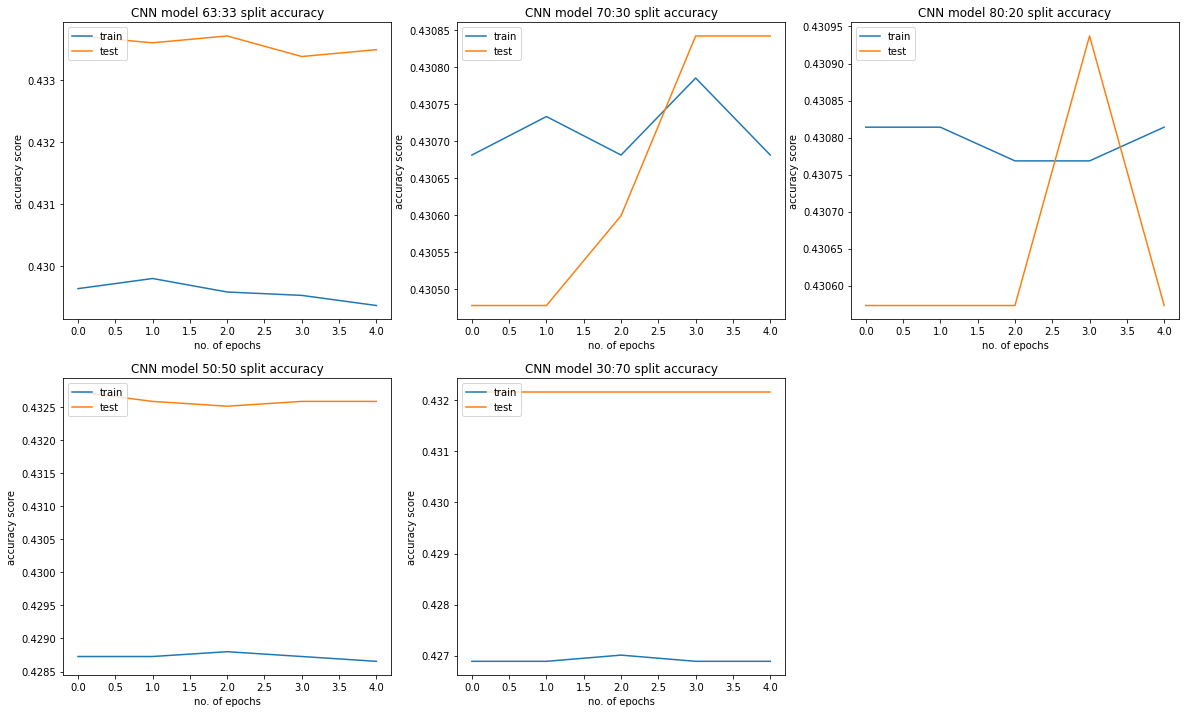

In [66]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('CNN model 63:33 split accuracy')
plt.ylabel('accuracy score')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 3, 2)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('CNN model 70:30 split accuracy')
plt.ylabel('accuracy score')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 3, 3)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('CNN model 80:20 split accuracy')
plt.ylabel('accuracy score')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 3, 4)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('CNN model 50:50 split accuracy')
plt.ylabel('accuracy score')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 3, 5)
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('CNN model 30:70 split accuracy')
plt.ylabel('accuracy score')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

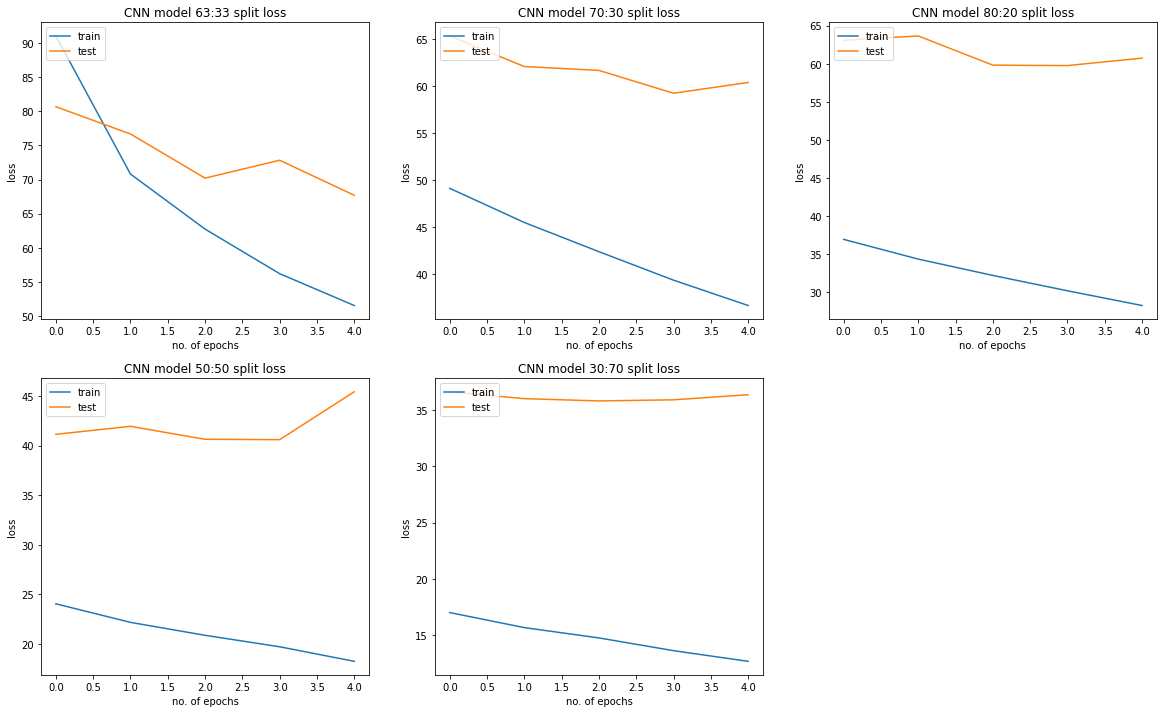

In [67]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('CNN model 63:33 split loss')
plt.ylabel('loss')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 3, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('CNN model 70:30 split loss')
plt.ylabel('loss')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 3, 3)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('CNN model 80:20 split loss')
plt.ylabel('loss')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 3, 4)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('CNN model 50:50 split loss')
plt.ylabel('loss')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2, 3, 5)
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('CNN model 30:70 split loss')
plt.ylabel('loss')
plt.xlabel('no. of epochs')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [68]:
history1.history['accuracy']

[0.4296424984931946,
 0.4298054873943329,
 0.4295881688594818,
 0.42953383922576904,
 0.42937085032463074]

In [69]:
history2.history['accuracy']

[0.4306812286376953,
 0.43073323369026184,
 0.4306812286376953,
 0.43078523874282837,
 0.4306812286376953]

In [70]:
history3.history['accuracy']

[0.4308140277862549,
 0.4308140277862549,
 0.43076851963996887,
 0.43076851963996887,
 0.4308140277862549]

In [71]:
history4.history['accuracy']

[0.4287274181842804,
 0.4287274181842804,
 0.42880022525787354,
 0.4287274181842804,
 0.42865464091300964]

In [72]:
history5.history['accuracy']

[0.42688992619514465,
 0.42688992619514465,
 0.42701128125190735,
 0.42688992619514465,
 0.42688992619514465]